# PyBullet Quick Start

## Connect, load, simulation, and disconnect

In [2]:
import pybullet as p
import pybullet_data

physicsClient = p.connect(p.GUI)  # or p.DIRECT for non-graphical version

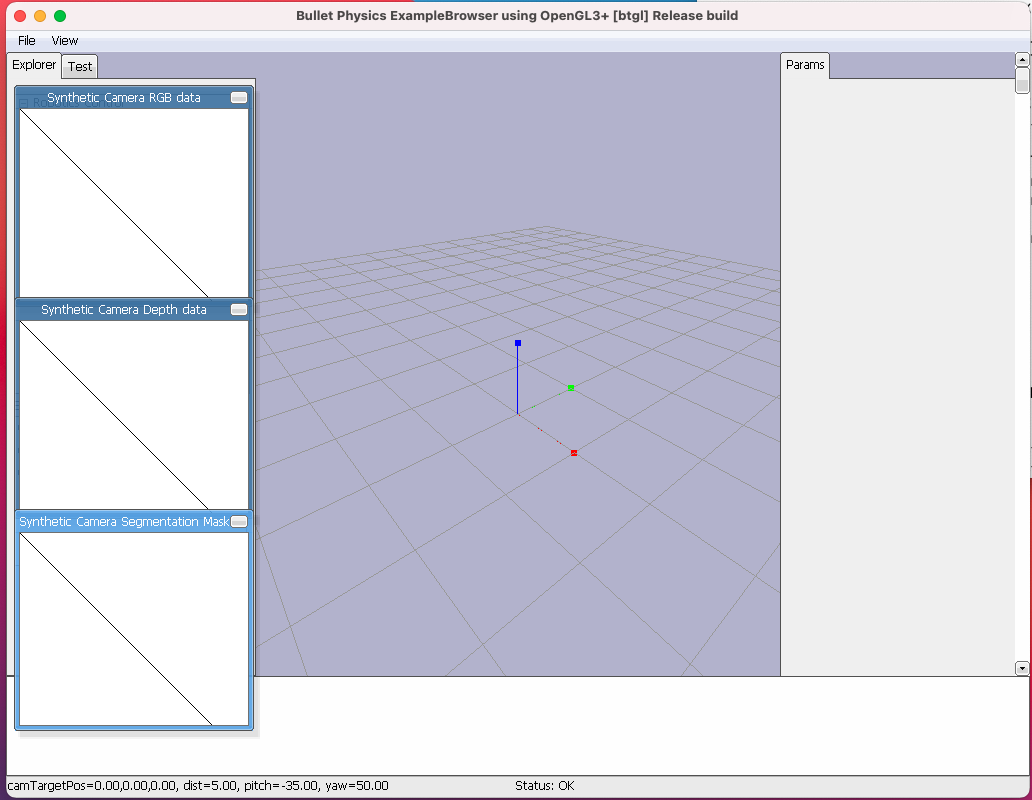

In [3]:
p.setGravity(0, 0, -10)

In [4]:
planeId = p.loadURDF(f"{pybullet_data.getDataPath()}/plane.urdf")

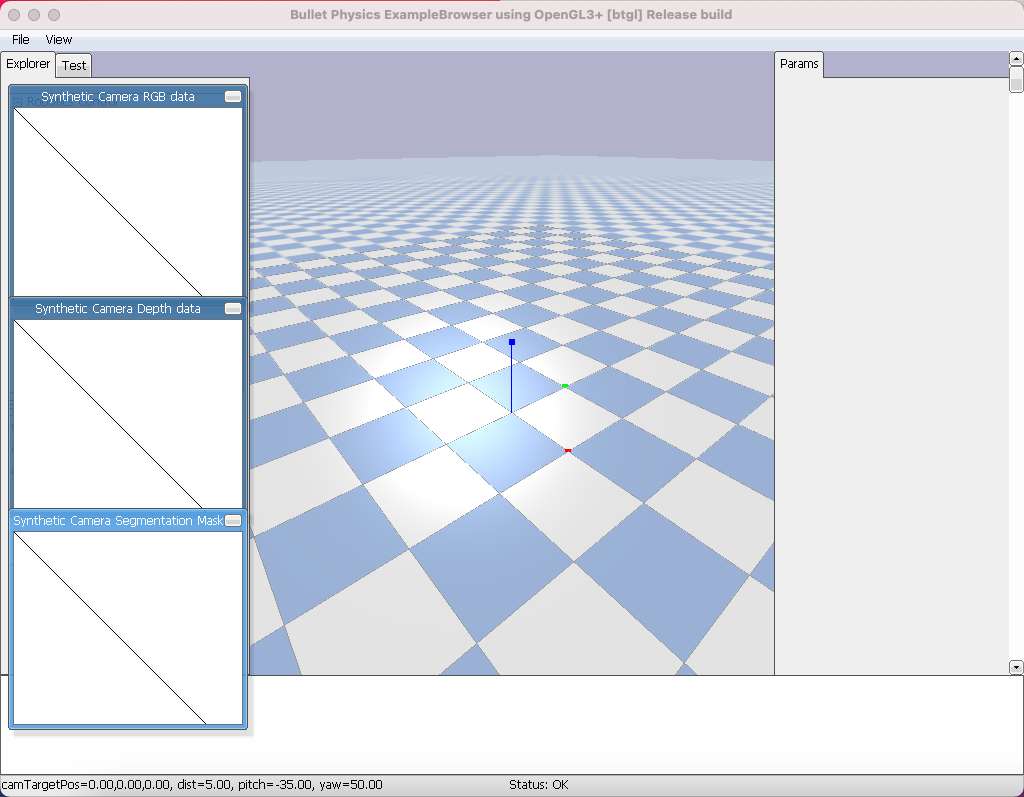

In [5]:
startPos = [0, 0, 1]
startOrientation = p.getQuaternionFromEuler([0, 0, 0])

In [6]:
boxId = p.loadURDF(
    f"{pybullet_data.getDataPath()}/r2d2.urdf", startPos, startOrientation
)

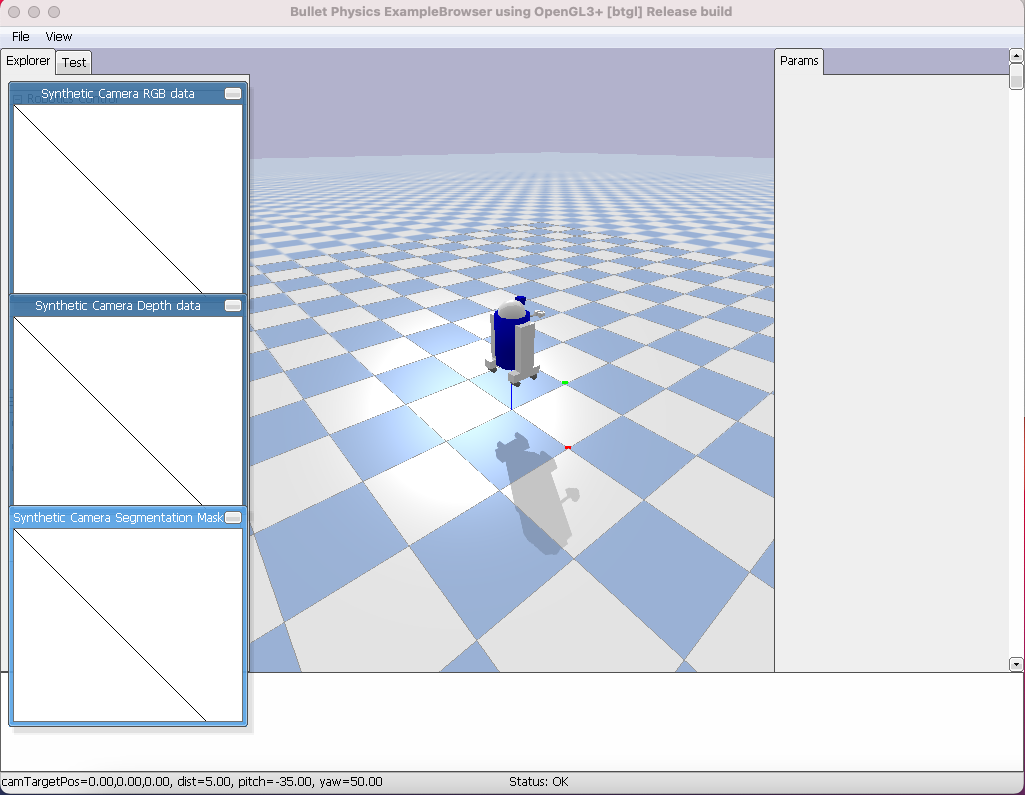`

In [7]:
for i in range(1000):
    p.stepSimulation()

In [8]:
cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
print(cubePos, cubeOrn)

(3.593173563620152e-07, 3.800531040126333e-05, 0.47099228995364517) (-2.6166032458546224e-08, 7.133864410053958e-09, 2.6196544000392865e-06, 0.9999999999965683)


In [7]:
p.disconnect()  # The server will all be shut down, however, the opengi windows will keep open

Before:  
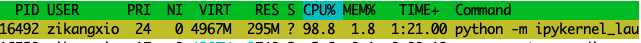  
After:  
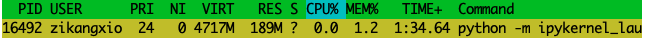

In [10]:
p.getConnectionInfo()

{'isConnected': 0, 'connectionMethod': 0}

## Load

In [2]:
physicsClient = p.connect(p.GUI)
planeId = p.loadURDF(f"{pybullet_data.getDataPath()}/plane.urdf")
obj_id = p.loadMJCF(f"res/safety-gym-xml/point.xml")
p.disconnect()

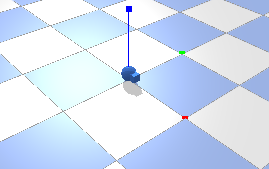

## Create Shape and Collision Programmatically 

In [1]:
import pybullet as p
import pybullet_data

cid = p.connect(p.SHARED_MEMORY)
if cid < 0:
    p.connect(p.GUI)

In [2]:
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setPhysicsEngineParameter(numSolverIterations=10)
p.setTimeStep(1.0 / 120.0)

In [3]:
# useMaximalCoordinates is much faster then the default reduced coordinates (Featherstone)
p.loadURDF("plane100.urdf", useMaximalCoordinates=True)
shift = [0, -0.02, 0]
meshScale = [0.1, 0.1, 0.1]

In [4]:
# the visual shape and collision shape can be re-used by all createMultiBody instances (instancing)
visualShapeId = p.createVisualShape(
    shapeType=p.GEOM_MESH,
    fileName="duck.obj",
    rgbaColor=[1, 1, 1, 1],
    specularColor=[0.4, 0.4, 0],
    visualFramePosition=shift,
    meshScale=meshScale,
)

In [5]:
collisionShapeId = p.createCollisionShape(
    shapeType=p.GEOM_MESH,
    fileName="duck_vhacd.obj",
    collisionFramePosition=shift,
    meshScale=meshScale,
)

In [7]:
rangex = 1
rangey = 1
for i in range(rangex):
    for j in range(rangey):
        p.createMultiBody(
            baseMass=1,
            baseInertialFramePosition=[0, 0, 0],
            baseCollisionShapeIndex=collisionShapeId,
            baseVisualShapeIndex=visualShapeId,
            basePosition=[
                ((-rangex / 2) + i) * meshScale[0] * 2,
                (-rangey / 2 + j) * meshScale[1] * 2,
                1,
            ],
            useMaximalCoordinates=True,
        )
p.configureDebugVisualizer(p.COV_ENABLE_RENDERING, 1)

p.setGravity(0, 0, -10)

In [ ]:
import time

p.setRealTimeSimulation(1)
for _ in range(1000):
    #     p.stepSimulation()
    time.sleep(1.0 / 240.0)
p.disconnect()

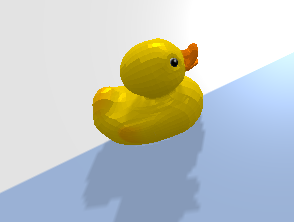

## Controlling a robot

In [1]:
import pybullet as p
import pybullet_data

p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

p.loadURDF("plane.urdf")
p.setGravity(0, 0, -10)
huskypos = [0, 0, 0.1]

husky = p.loadURDF("husky/husky.urdf", huskypos[0], huskypos[1], huskypos[2])
numJoints = p.getNumJoints(husky)
for joint in range(numJoints):
    print(p.getJointInfo(husky, joint))
targetVel = 10  # rad/s
maxForce = 100  # Newton

for joint in range(2, 6):
    p.setJointMotorControl(husky, joint, p.VELOCITY_CONTROL, targetVel, maxForce)
for step in range(300):
    p.stepSimulation()

targetVel = -10
for joint in range(2, 6):
    p.setJointMotorControl(husky, joint, p.VELOCITY_CONTROL, targetVel, maxForce)
for step in range(400):
    p.stepSimulation()

p.getContactPoints(husky)

p.disconnect()

(0, b'chassis_joint', 4, -1, -1, 0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'base_link', (0.0, 0.0, 0.0), (0.0, 0.0, 0.14493), (0.0, 0.0, 0.0, 1.0), -1)
(1, b'imu_joint', 4, -1, -1, 0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'imu_link', (0.0, 0.0, 0.0), (0.08748, 0.00085, 0.09053), (0.0, 0.0, 0.0, 1.0), 0)
(2, b'front_left_wheel', 0, 7, 6, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'front_left_wheel_link', (0.0, 1.0, 0.0), (0.34348, 0.28625, -0.06665), (0.0, 0.0, 0.0, 1.0), 0)
(3, b'front_right_wheel', 0, 8, 7, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'front_right_wheel_link', (0.0, 1.0, 0.0), (0.34348, -0.28454999999999997, -0.06665), (0.0, 0.0, 0.0, 1.0), 0)
(4, b'rear_left_wheel', 0, 9, 8, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'rear_left_wheel_link', (0.0, 1.0, 0.0), (-0.16852, 0.28625, -0.06665), (0.0, 0.0, 0.0, 1.0), 0)
(5, b'rear_right_wheel', 0, 10, 9, 1, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'rear_right_wheel_link', (0.0, 1.0, 0.0), (-0.16852, -0.28454999999999997, -0.06665), (0.0, 0.0, 0.0, 1.0), 0)
(6, b'top_plate

## 